In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.qda import QDA
from sklearn.lda import LDA
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold

In [3]:
path = "../data/"
iris_filename = "iris/iris.data.txt"

In [4]:
df_iris = pd.read_csv(path + iris_filename, sep=',')

In [5]:
matrix = df_iris.as_matrix()

In [6]:
X = matrix[:, :-1]
y = matrix[:, -1]

In [7]:
set(y)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Preprocess data

In [8]:
standart_scaler = preprocessing.StandardScaler()
X_scaled = standart_scaler.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### LDA 

In [9]:
lda_cls = LDA()
scores = cross_val_score(lda_cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.09)


### QDA

In [10]:
qda_cls = QDA()
scores = cross_val_score(qda_cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.09)


### kNN classifier

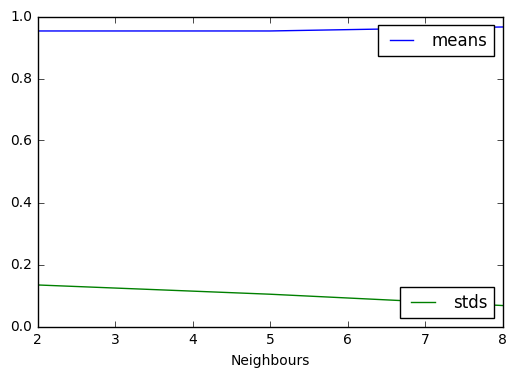

In [11]:
neighbours = range(2, 10, 3)
means = []
stds = []
for i in neighbours:
    cls = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cls, X_scaled, y, cv=10)
    means.append(scores.mean())
    stds.append(scores.std() * 2)

mean_line, = plt.plot(neighbours, means, label='means')
stds_line, = plt.plot(neighbours, stds, label='stds')
first_legend = plt.legend(handles=[mean_line], loc=1)
plt.gca().add_artist(first_legend)
plt.legend(handles=[stds_line], loc=4)
plt.xlabel("Neighbours")
plt.show()

### Mean result with kNN on cross-validation:

In [12]:
print("Accuracy: {:.2f} (+/- {:.2f})".format(np.mean(means), np.mean(stds)))

Accuracy: 0.96 (+/- 0.10)


### Logistic regression

In [13]:
logistic = linear_model.LogisticRegression()
scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.07)


### SVM

#### Linear kernel

In [14]:
cls = SVC(kernel='linear')
scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.11)


#### Polynomial

In [15]:
cls = SVC(kernel='poly', degree=3)
scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.11)


#### RBF

In [16]:
cls = SVC(kernel='rbf')
scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.09)


### DecisionTreeClassifier

In [17]:
cls = DecisionTreeClassifier()

scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.09)


### RandomForestClassifier

In [18]:
cls = RandomForestClassifier()

scores = cross_val_score(cls, X_scaled, y, cv=10)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.09)


## Conclusion: best classifier on Iris dataset is LDA and QDA

# Boston dataset

In [19]:
path = "../data/"
boston_filename = "boston/housing.data.txt"

In [20]:
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [21]:
df_boston = pd.read_csv(path + boston_filename, sep='\s+', header=None)

In [22]:
df_boston.columns = header

In [23]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
matrix = df_boston.as_matrix()

In [25]:
X = matrix[:, :-1]
y = matrix[:, -1]

### Preprocess data

In [26]:
standart_scaler = preprocessing.StandardScaler()
X_scaled = standart_scaler.fit_transform(X)

### Linear regression

In [27]:
alphas = np.linspace(1, 1000, 100)

In [28]:
def train_method(reg):
    reg.fit(X_scaled, y)
    p = reg.predict(X_scaled)
    e = p - y
    rms = math.sqrt(e.dot(e) / len(y))
    
    squres_sum = .0
    kf = KFold(n_splits=10)
    for train, test in kf.split(X_scaled):
        reg.fit(X_scaled[train], y[train])
        p = reg.predict(X_scaled[test])
        e = p - y[test]
        squres_sum += e.dot(e)
    kfold_rms = math.sqrt(squres_sum / len(y))
    
    return rms, kfold_rms

In [29]:
def test_method(method):
    all_rms = []
    all_kfold_rms = []
    for alpha in alphas:
        method.alpha = alpha
        rms, kfold_rms = train_method(method(alpha=alpha))
        all_rms.append(rms)
        all_kfold_rms.append(kfold_rms)
    
    all_rms_line, = plt.plot(alphas, all_rms, linestyle='--', label='RMS on all data')
    all_kfold_rms_line, = plt.plot(alphas, all_kfold_rms, label='RMS on Kfolded data')
    first_legend = plt.legend(handles=[all_rms_line], loc=4)
    plt.gca().add_artist(first_legend)
    plt.legend(handles=[all_kfold_rms_line], loc=1)
    plt.xlabel("RMS's")
    plt.show()

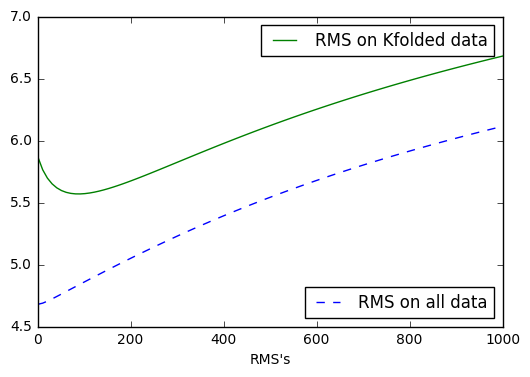

In [30]:
test_method(Ridge)

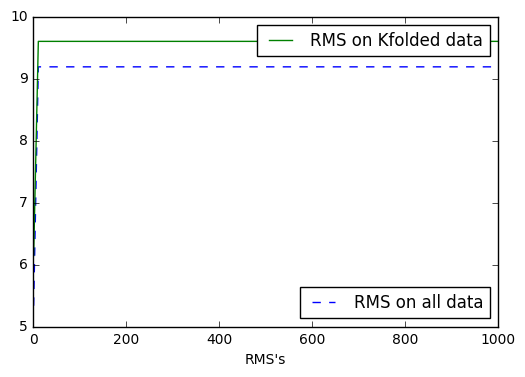

In [31]:
test_method(Lasso)

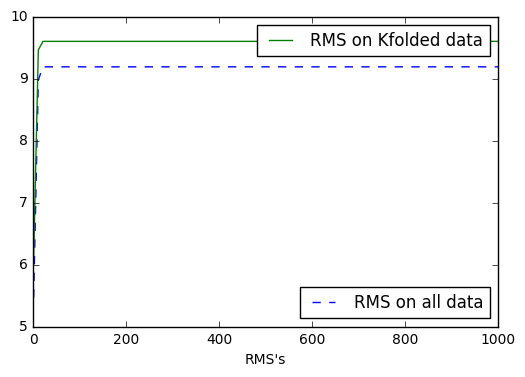

In [32]:
test_method(ElasticNet)

### Let's perform feature selection

In [33]:
def get_best_feature(X_given, X, y):
    feat_num = X.shape[1]
    rms = []
    linreg = LinearRegression()
    for i in range(feat_num):
        sample_X = np.append(X_given, X[:, i:i+1], axis=1)
        linreg.fit(sample_X, y)
        p = linreg.predict(sample_X)
        e = p - y
        rms.append(math.sqrt(e.dot(e) / len(y)))
        
    print(min(rms))
    return np.argmin(np.array(rms))

In [34]:
iters = 8

print("RMS at each selection:")

X_given = np.empty(shape=(X_scaled.shape[0], 0))
best_feats = []
for i in range(iters):
    print("# of features = {}: RMS = ".format(i + 1), end="")
    best_feat = get_best_feature(X_given, X, y)
    X_given = np.append(X_given, X_scaled[:, best_feat:best_feat+1], axis=1)
    best_feats.append(best_feat)

print("\nBest features:")
print(df_boston.columns[best_feats].tolist())

RMS at each selection:
# of features = 1: RMS = 6.203464131426419
# of features = 2: RMS = 5.523809263298242
# of features = 3: RMS = 5.20868560756906
# of features = 4: RMS = 5.113128823802321
# of features = 5: RMS = 4.964168876061074
# of features = 6: RMS = 4.898389009978543
# of features = 7: RMS = 4.843037381815491
# of features = 8: RMS = 4.804127727463793

Best features:
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']
